# Big Mart Sales Prediction

## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find
out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in
increasing sales.


### Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
big_mart = pd.read_csv('bigmart.csv')
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
big_mart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Date exploration

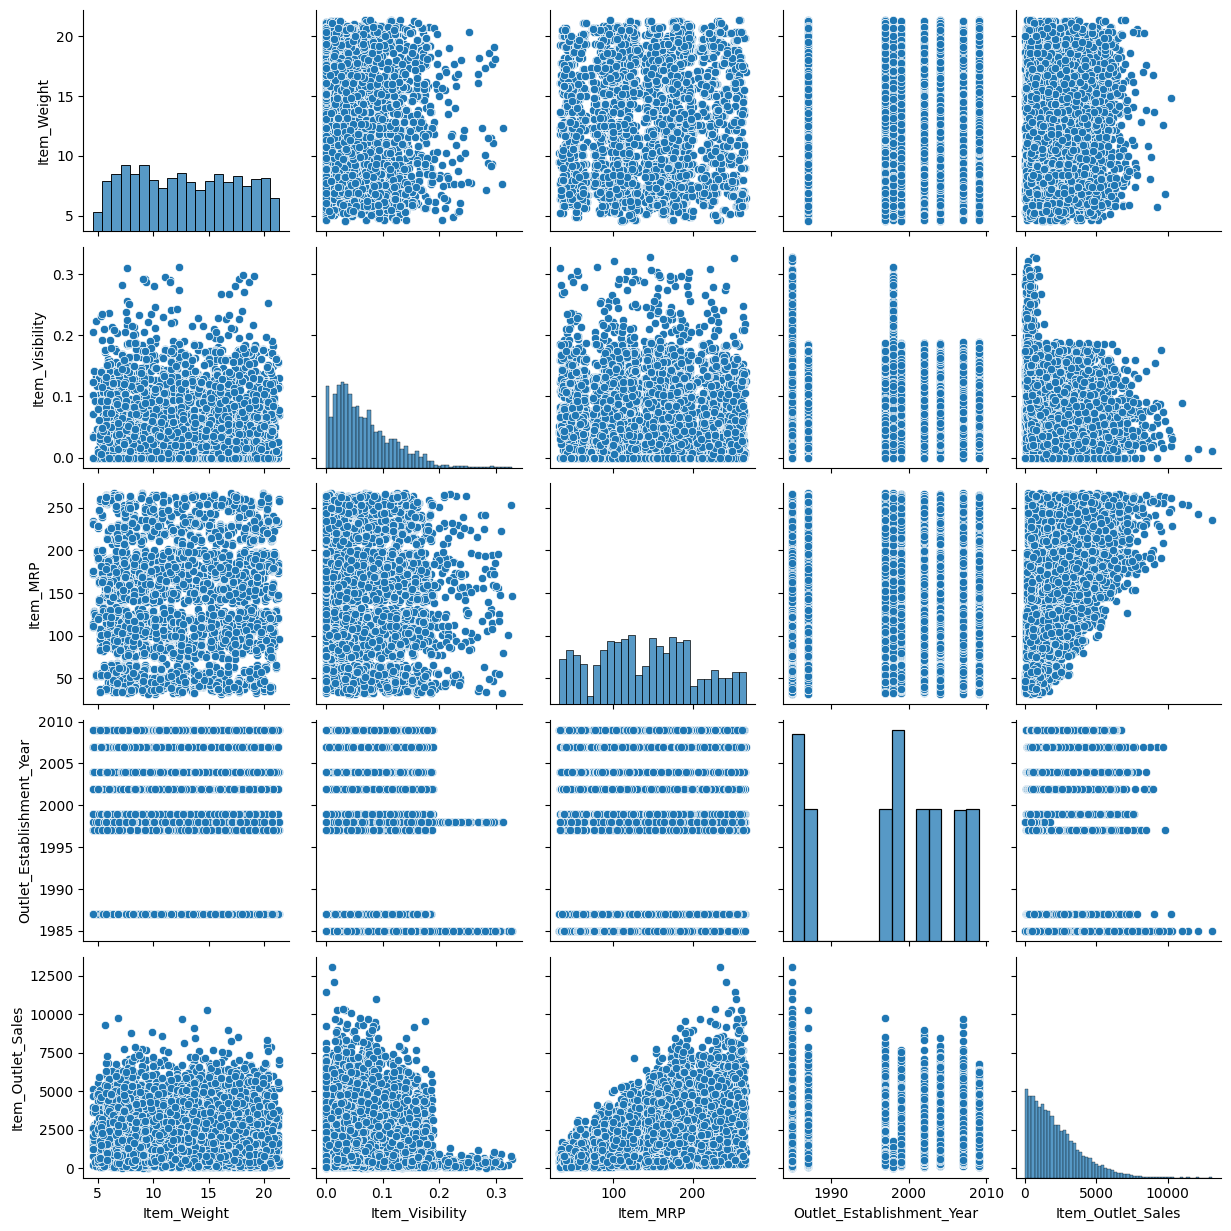

In [18]:
sns.pairplot(big_mart)

<Axes: >

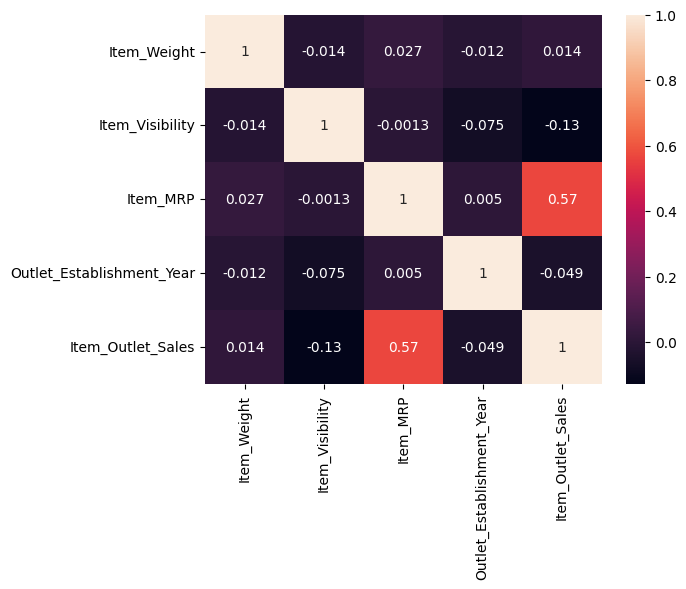

In [20]:
sns.heatmap(big_mart.select_dtypes(['float64','int64']).corr(), annot=True)

There is relation between the item mrp and item outlet sales

<Axes: xlabel='Item_Type'>

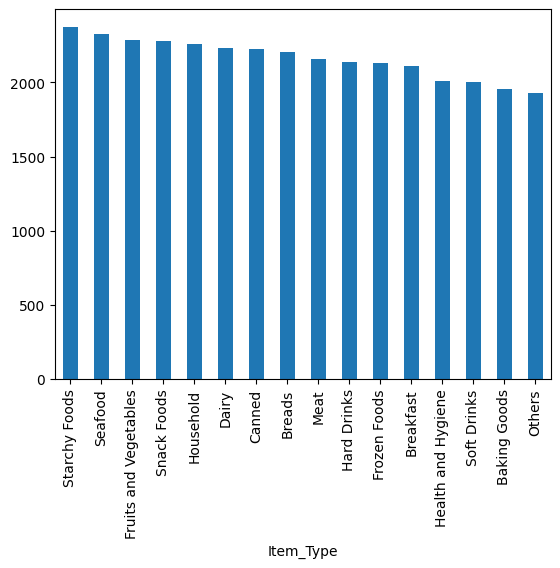

In [23]:
big_mart.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot.bar();

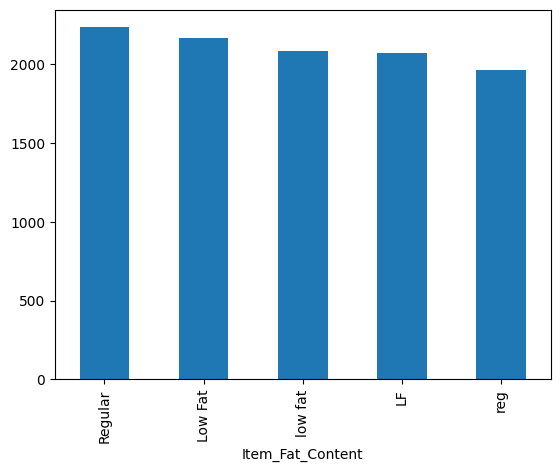

In [41]:
big_mart.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot.bar();

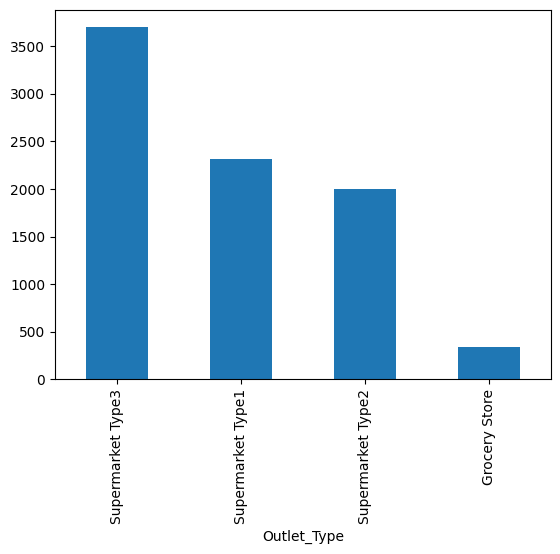

In [24]:
big_mart.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot.bar();

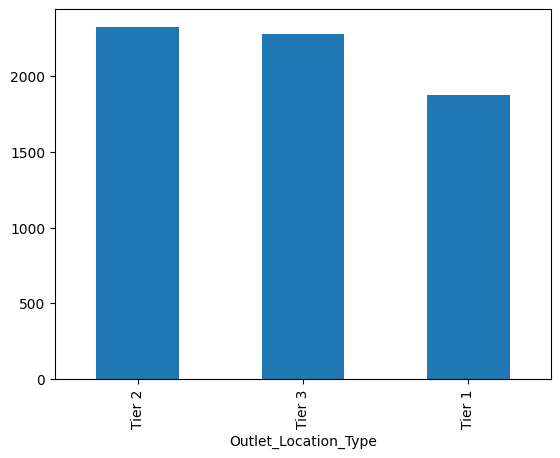

In [31]:
big_mart.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot.bar();

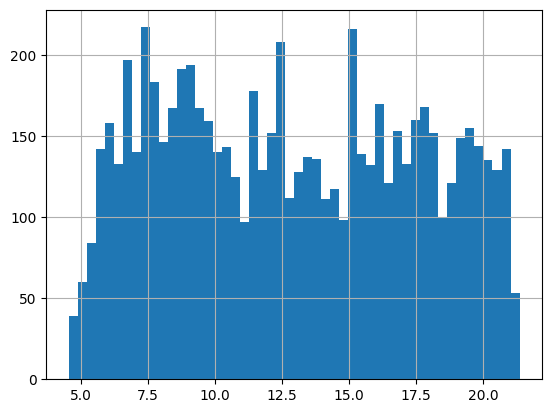

In [34]:
big_mart['Item_Weight'].hist(bins=50);

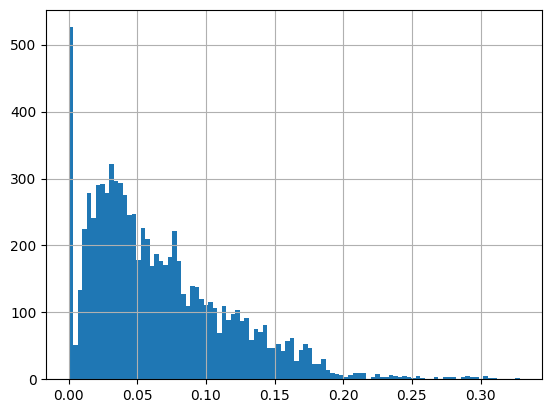

In [45]:
big_mart['Item_Visibility'].hist(bins=100);

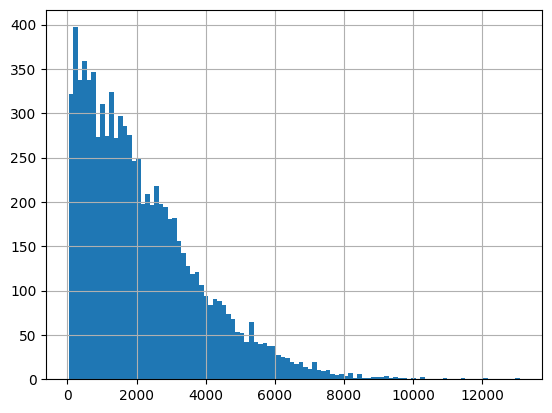

In [32]:
big_mart['Item_Outlet_Sales'].hist(bins=100);

There is right skewness in the data

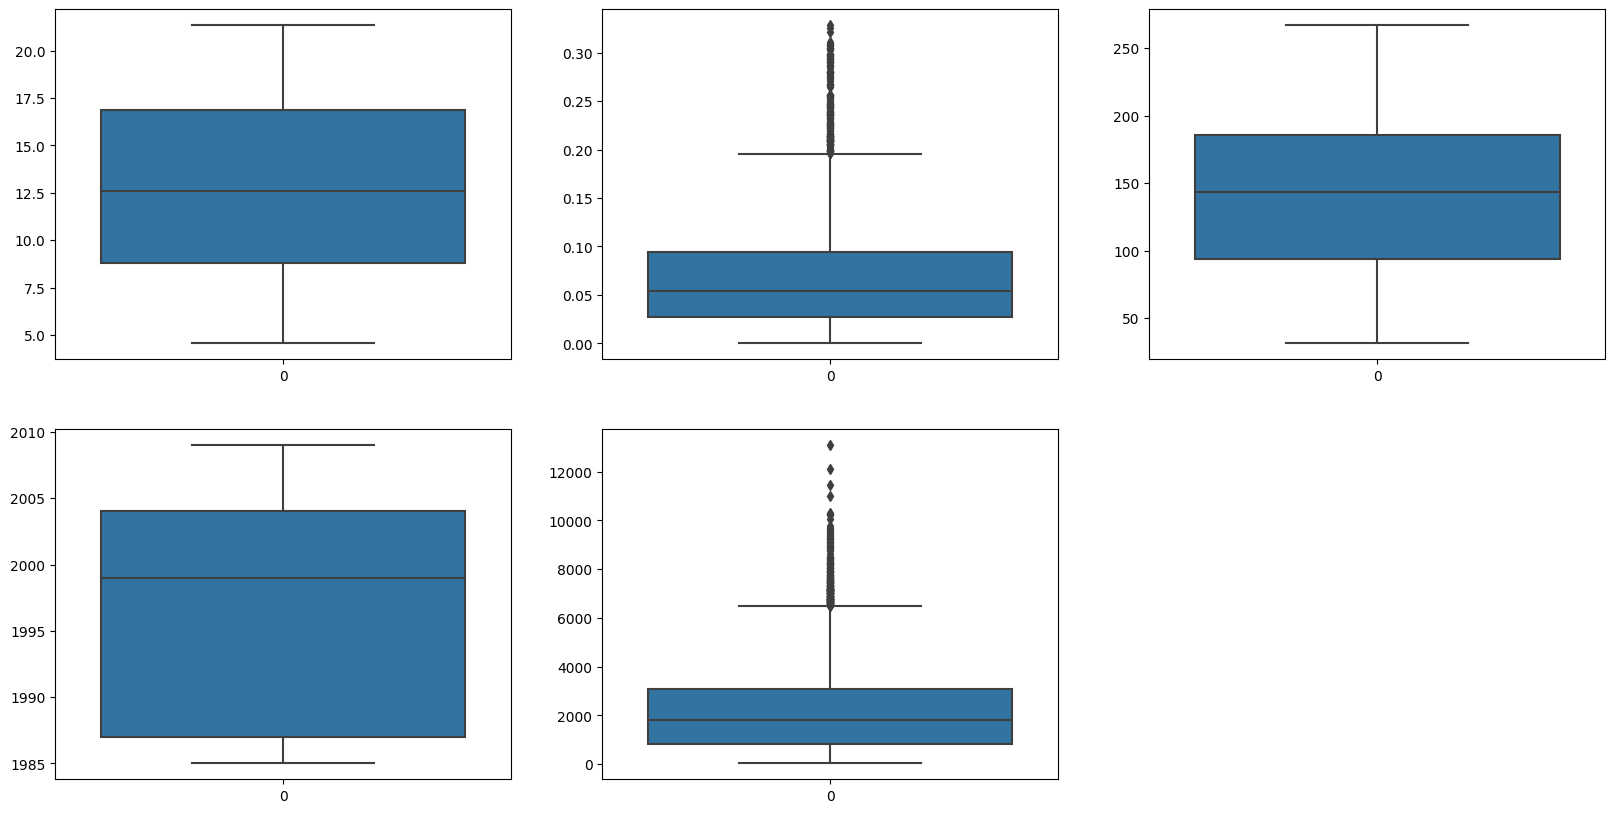

In [39]:
# boxplot for all numeric columns side by side
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(big_mart['Item_Weight'])
plt.subplot(2,3,2)
sns.boxplot(big_mart['Item_Visibility'])
plt.subplot(2,3,3)
sns.boxplot(big_mart['Item_MRP'])
plt.subplot(2,3,4)
sns.boxplot(big_mart['Outlet_Establishment_Year'])
plt.subplot(2,3,5)
sns.boxplot(big_mart['Item_Outlet_Sales'])
plt.show()


### Data Preprocessing

In [8]:
big_mart.drop(['Item_Identifier'], axis=1, inplace=True)

In [42]:
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)

In [ ]:
# change the reg and LF to Regular and Low Fat 
big_mart['Item_Fat_Content'].replace(['reg','LF'],['Regular','Low Fat'], inplace=True)